# Imports


In [24]:
%load_ext autoreload
%autoreload 2


import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from scripts.clusterer import CluStream
from scripts.dynamic_clusterer import DynamicClusterer
from scripts.utils import (
    get_colors,
    clean_directory,
    get_data,
    plot_data,
    linear_trajectory,
    circular_trajectory,
)
import numpy as np
from river import drift

In [26]:
colors = get_colors()
ids = []

number of colors defined: 20


# Testing


### Circular shifting


Slow shifting


New model created - id: 96292
(id: 0 - cen: [ 0.08 -0.88] - rad: 3.55)
(id: 1 - cen: [30.05 -0.26] - rad: 2.33)
<!> Change detected! Possible input drift at timestamp 96 ----> Apply macroclustering <!>

(id: 0 - cen: [ 0.08 -0.88] - rad: 3.55) SURVIVED as (id: 0 - cen: [-0.32 -0.39] - rad: 3.7) (score: 0.941059548859105)
(id: 1 - cen: [30.05 -0.26] - rad: 2.33) SURVIVED as (id: 1 - cen: [29.71  0.59] - rad: 2.58) (score: 0.8794784234910628)
Final macroclusters:
(id: 0 - cen: [-0.32 -0.39] - rad: 3.7)
(id: 1 - cen: [29.71  0.59] - rad: 2.58)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 267 ----> Apply macroclustering <!>

(id: 0 - cen: [-0.32 -0.39] - rad: 3.7) SURVIVED as (id: 0 - cen: [-0.41 -0.32] - rad: 3.79) (score: 0.9892777891026527)
(id: 1 - cen: [29.71  0.59] - rad: 2.58) SURVIVED as (id: 1 - cen: [29.45  5.11] - rad: 3.26) (score: 0.5841007620834555)
Final macroclusters:
(id: 0 - ce

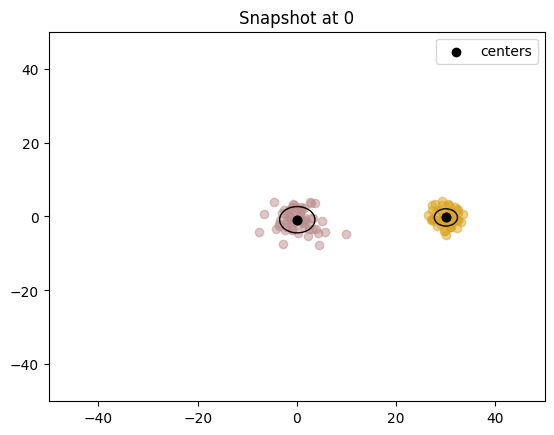

<Figure size 1000x1000 with 0 Axes>

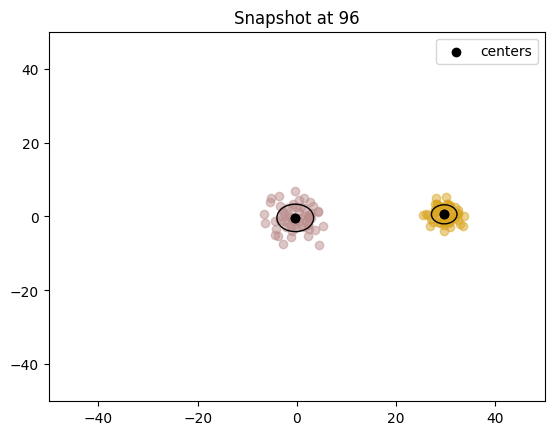

<Figure size 1000x1000 with 0 Axes>

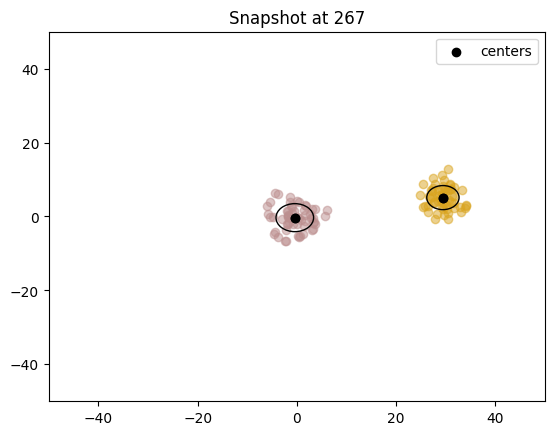

<Figure size 1000x1000 with 0 Axes>

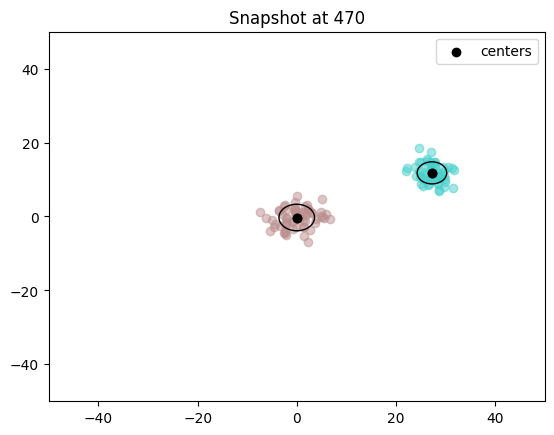

<Figure size 1000x1000 with 0 Axes>

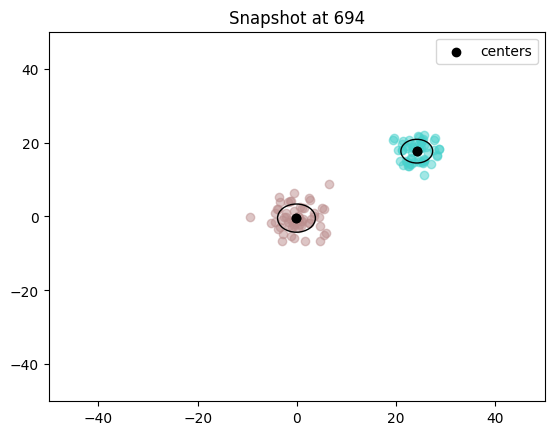

<Figure size 1000x1000 with 0 Axes>

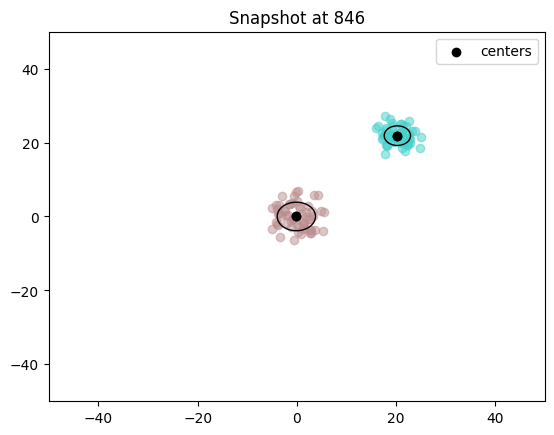

<Figure size 1000x1000 with 0 Axes>

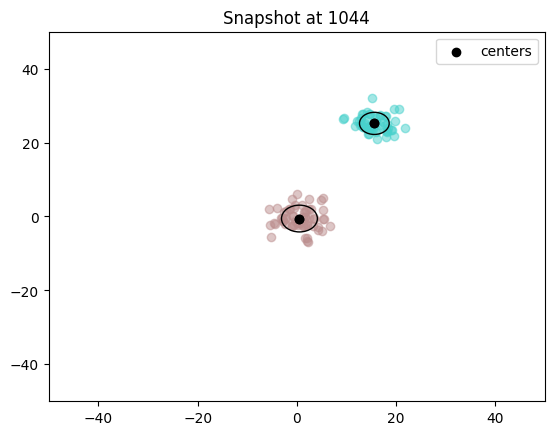

<Figure size 1000x1000 with 0 Axes>

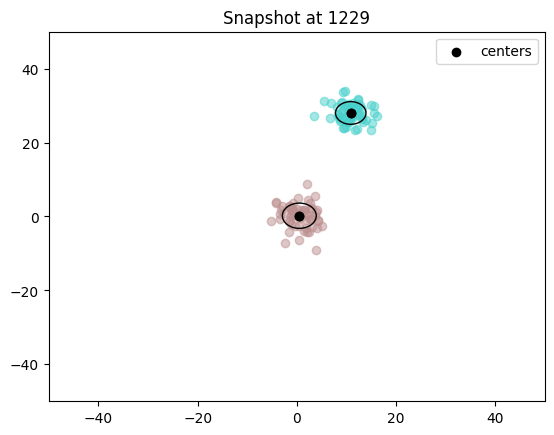

<Figure size 1000x1000 with 0 Axes>

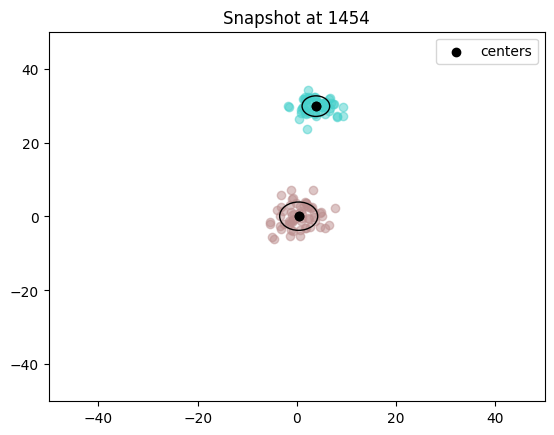

<Figure size 1000x1000 with 0 Axes>

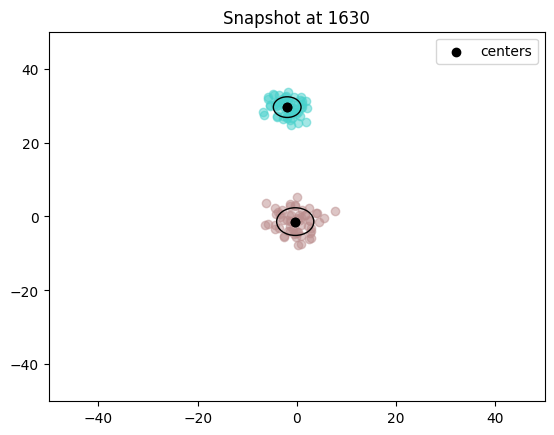

<Figure size 1000x1000 with 0 Axes>

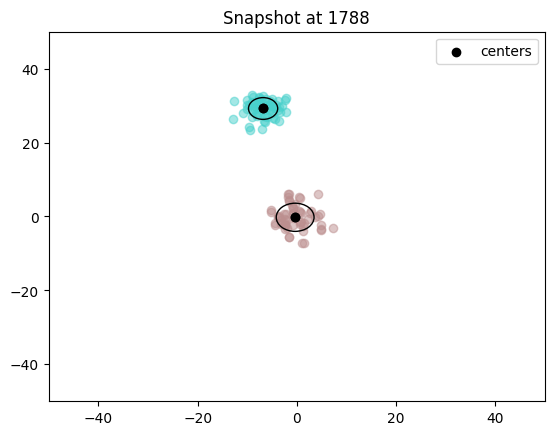

<Figure size 1000x1000 with 0 Axes>

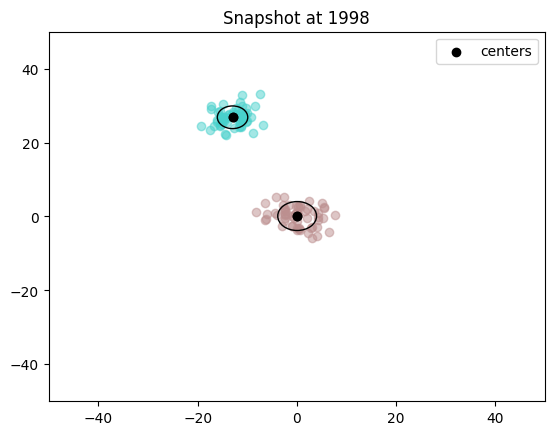

<Figure size 1000x1000 with 0 Axes>

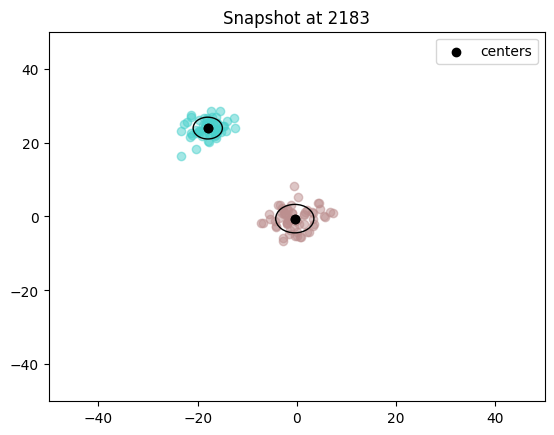

<Figure size 1000x1000 with 0 Axes>

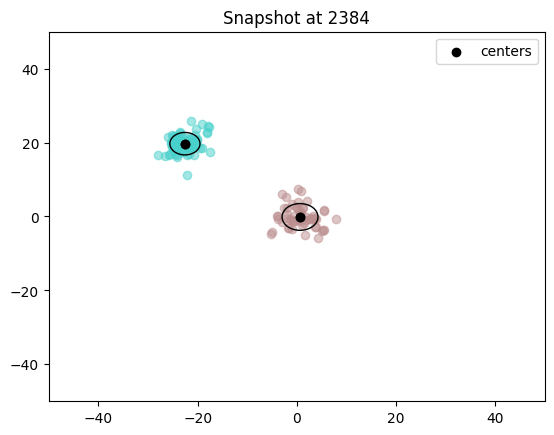

<Figure size 1000x1000 with 0 Axes>

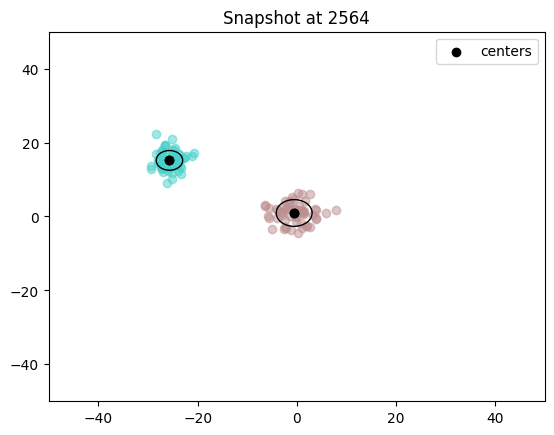

<Figure size 1000x1000 with 0 Axes>

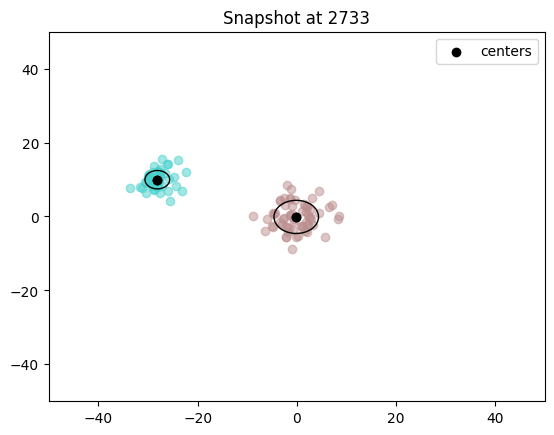

<Figure size 1000x1000 with 0 Axes>

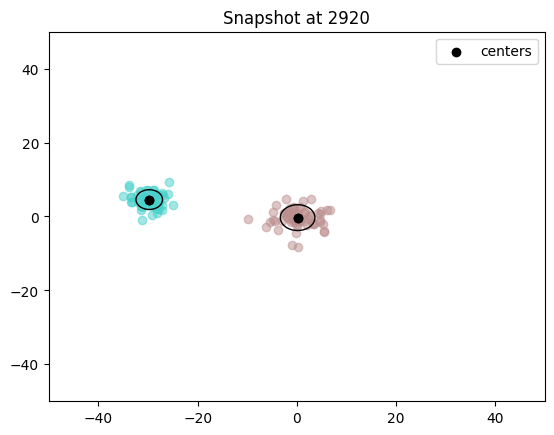

<Figure size 1000x1000 with 0 Axes>

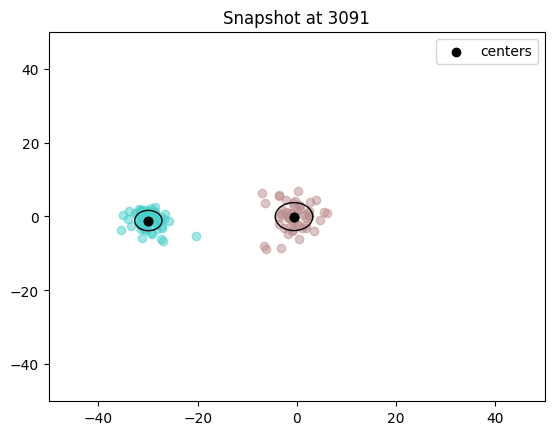

<Figure size 1000x1000 with 0 Axes>

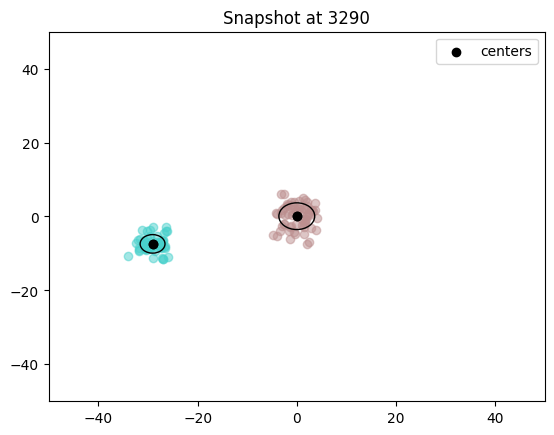

<Figure size 1000x1000 with 0 Axes>

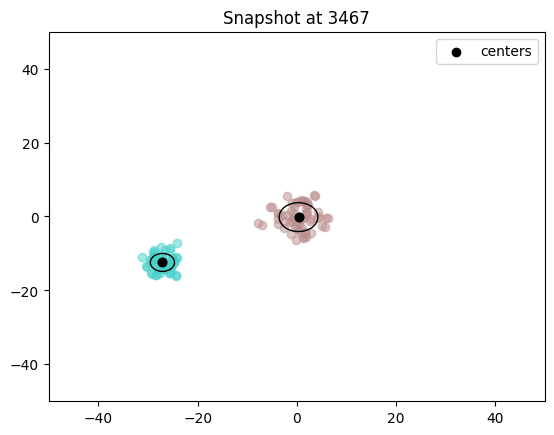

<Figure size 1000x1000 with 0 Axes>

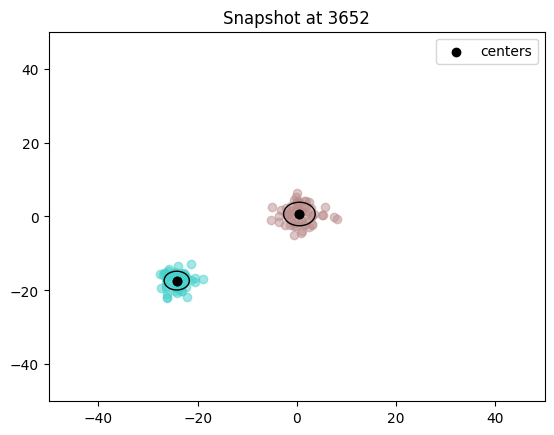

<Figure size 1000x1000 with 0 Axes>

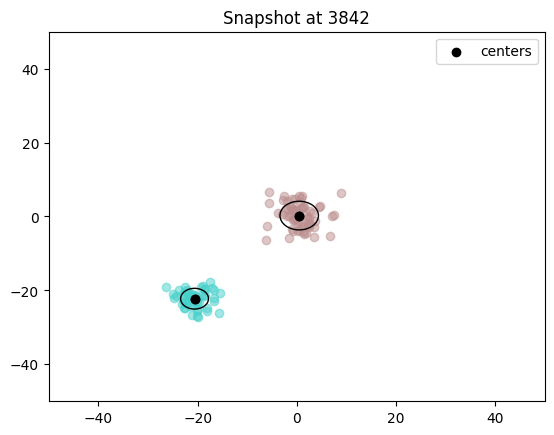

<Figure size 1000x1000 with 0 Axes>

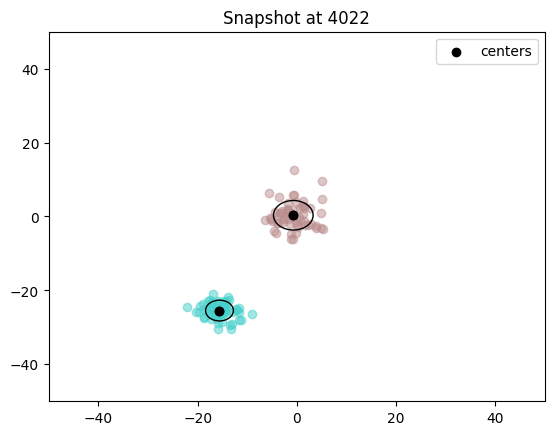

<Figure size 1000x1000 with 0 Axes>

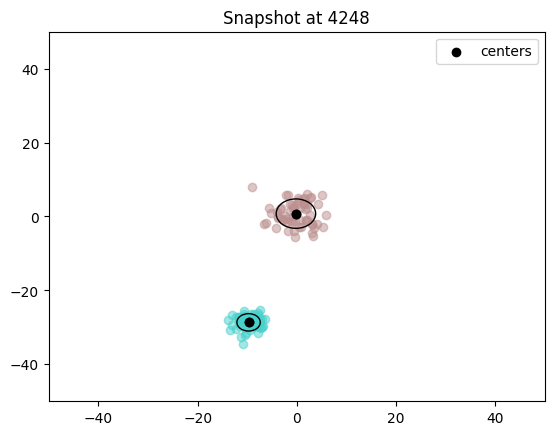

<Figure size 1000x1000 with 0 Axes>

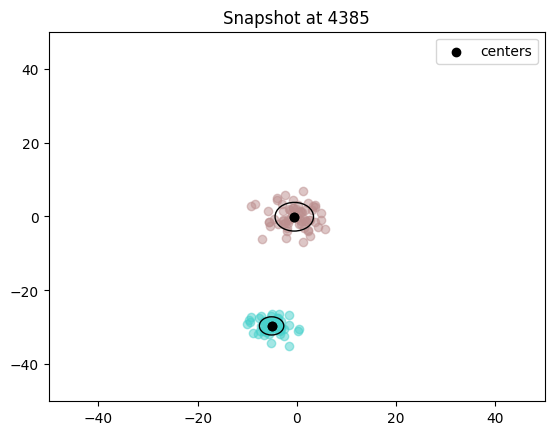

<Figure size 1000x1000 with 0 Axes>

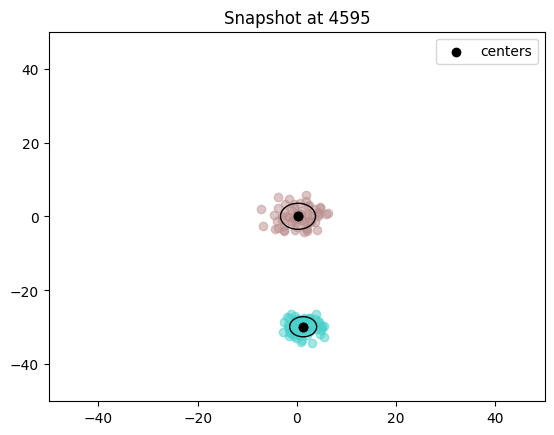

<Figure size 1000x1000 with 0 Axes>

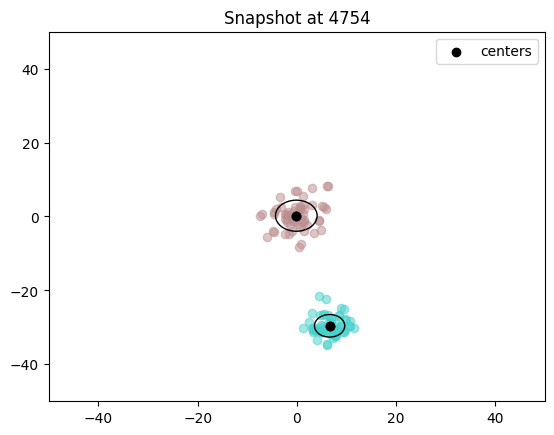

<Figure size 1000x1000 with 0 Axes>

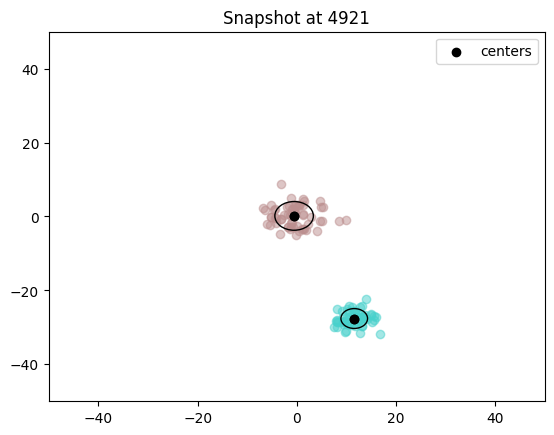

<Figure size 1000x1000 with 0 Axes>

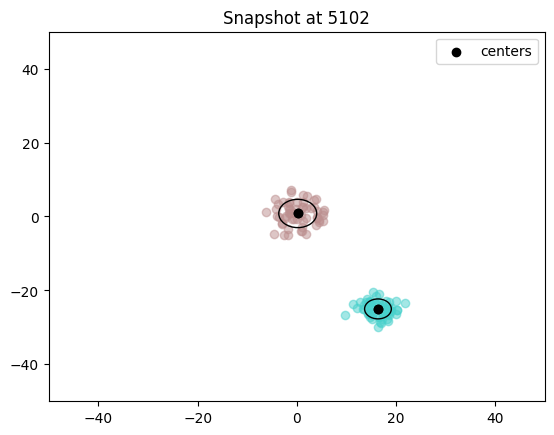

<Figure size 1000x1000 with 0 Axes>

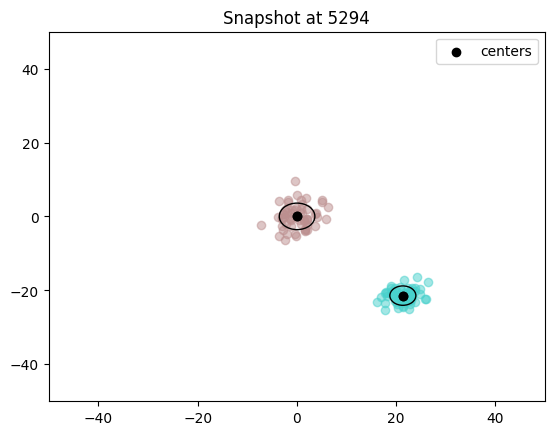

<Figure size 1000x1000 with 0 Axes>

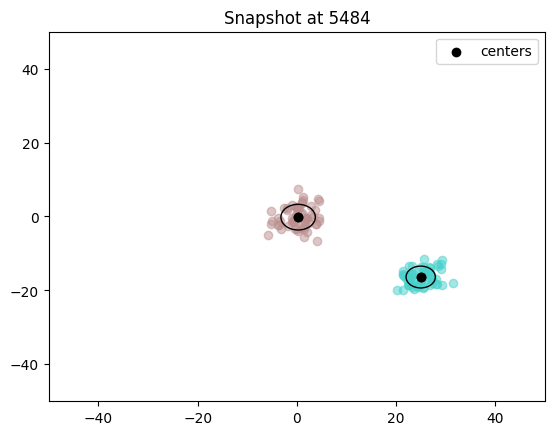

<Figure size 1000x1000 with 0 Axes>

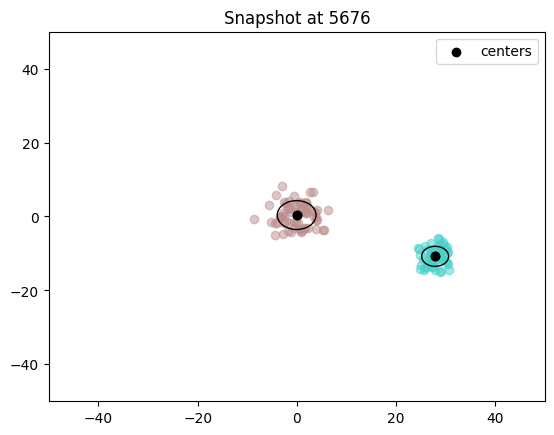

<Figure size 1000x1000 with 0 Axes>

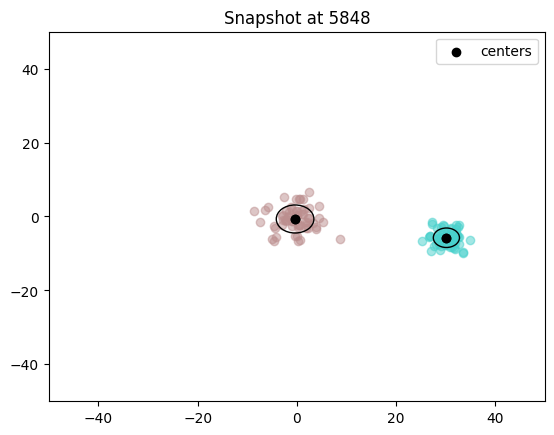

<Figure size 1000x1000 with 0 Axes>

In [27]:
""" ######################## Define Reference ########################"""

ref_means = np.array([[30, 0], [0, 0]])
ref_std_devs = np.array([[2, 2], [3, 3]])
n_samples_ref = 60


def init_reference(
    ref_means=ref_means,
    ref_std_devs=ref_std_devs,
    n_samples_ref=n_samples_ref,
    threshold=50,
):
    clustream_model = CluStream(
        max_micro_clusters=120,
        time_window=120,
        seed=0,
    )
    data_ref = get_data(ref_means, ref_std_devs, n_samples_ref)
    drift_detector = drift.PageHinkley(delta=0.005, threshold=threshold)
    clustream_reference = DynamicClusterer(
        data_ref,
        clustream_model,
        drift_detector,
        colors,
        x_limits=(-50, 50),
        y_limits=(-50, 50),
    )
    return clustream_reference


clustream = init_reference()
id = clustream.get_id()
ids.append(id)

full_data = get_data(ref_means, ref_std_devs, n_samples_ref)

""" ######################## Online ########################"""

trajectory = circular_trajectory(center_x=0, center_y=0, radius=30, num_points=100)

prod_means_shift = []
for element in trajectory:
    prod_means_shift.append(np.array([element, [0, 0]]))

prod_std_devs_shift = np.array([[2, 2], [3, 3]])
n_samples_shift = 30


for prod_means in prod_means_shift:
    prod_data = get_data(prod_means, prod_std_devs_shift, n_samples_shift)
    clustream.receive_prod(prod_data)
    clustream.fit_prod_data(plot_img=False, macroclustering_at_end=False)

    full_data = np.concatenate((full_data, prod_data), axis=0)
    # plot_data(full_data)

clustream.draw_snapshots()
clustream.draw_gif(title="circular shifting")
print()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


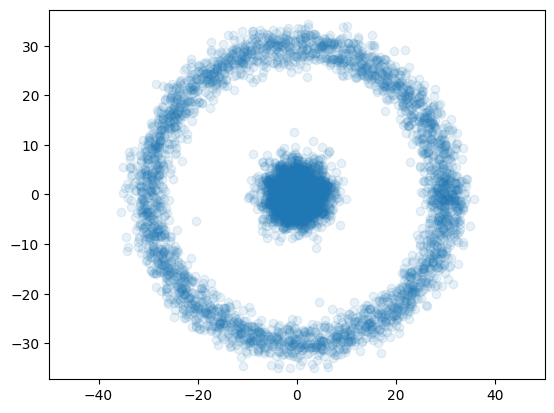

<Figure size 1000x1000 with 0 Axes>

In [28]:
plot_data(full_data)

Faster shifting


New model created - id: 23571
(id: 0 - cen: [30.04  0.08] - rad: 2.49)
(id: 1 - cen: [0.51 0.07] - rad: 3.8)
<!> Change detected! Possible input drift at timestamp 49 ----> Apply macroclustering <!>

(id: 0 - cen: [30.04  0.08] - rad: 2.49) SURVIVED as (id: 0 - cen: [29.76  1.04] - rad: 3.25) (score: 0.8862233553596778)
(id: 1 - cen: [0.51 0.07] - rad: 3.8) SURVIVED as (id: 1 - cen: [ 0.25 -0.01] - rad: 3.84) (score: 0.9761486809017459)
Final macroclusters:
(id: 0 - cen: [29.76  1.04] - rad: 3.25)
(id: 1 - cen: [ 0.25 -0.01] - rad: 3.84)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 91 ----> Apply macroclustering <!>

(id: 1 - cen: [ 0.25 -0.01] - rad: 3.84) SURVIVED as (id: 1 - cen: [0.46 0.14] - rad: 3.73) (score: 0.9774257082815098)
(id: 0 - cen: [29.76  1.04] - rad: 3.25) SURVIVED as (id: 0 - cen: [28.59  6.15] - rad: 6.67) (score: 0.6932813626488619)
Final macroclusters:
(id: 0 - cen: [2

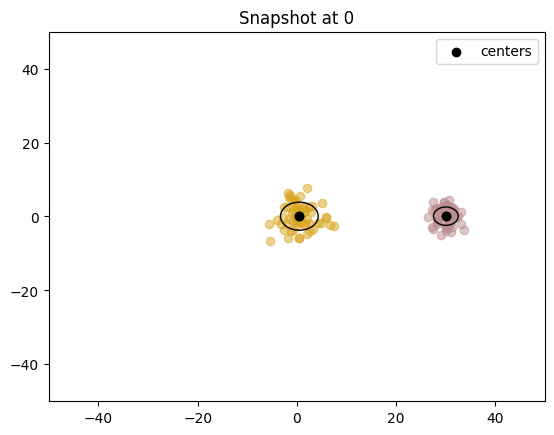

<Figure size 1000x1000 with 0 Axes>

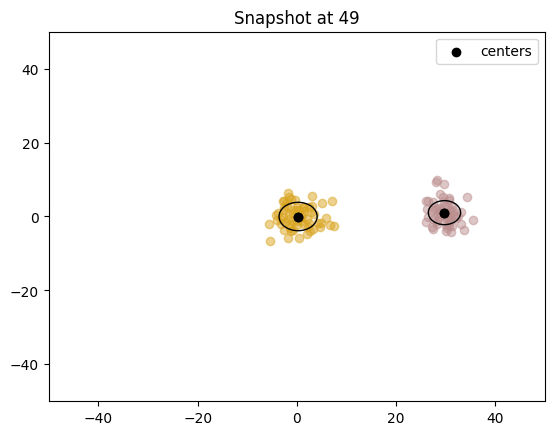

<Figure size 1000x1000 with 0 Axes>

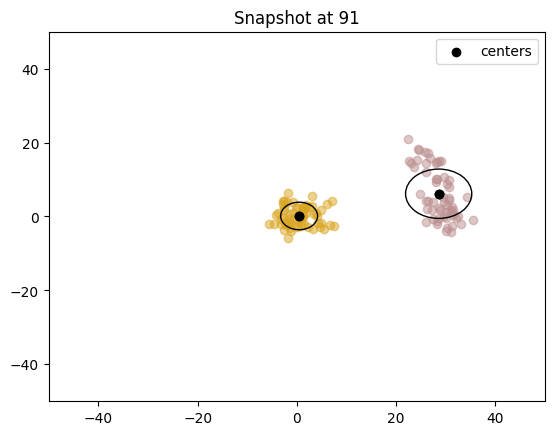

<Figure size 1000x1000 with 0 Axes>

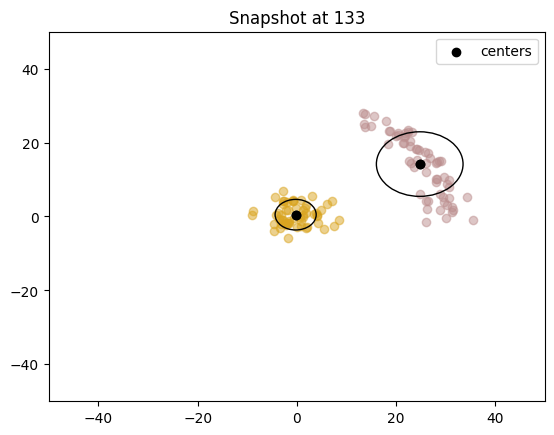

<Figure size 1000x1000 with 0 Axes>

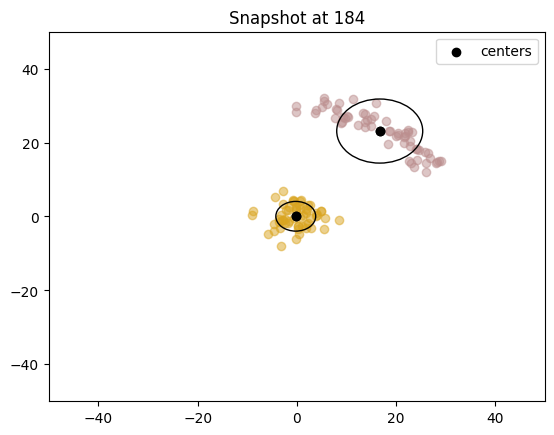

<Figure size 1000x1000 with 0 Axes>

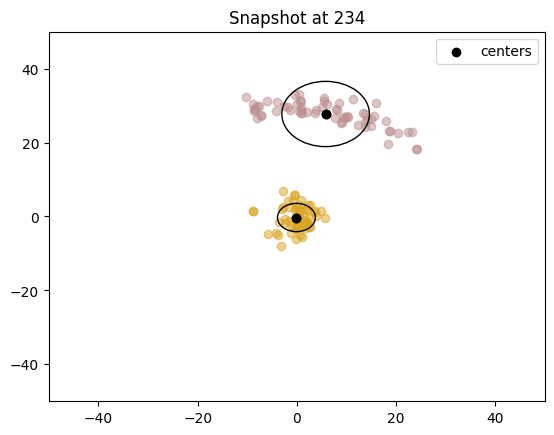

<Figure size 1000x1000 with 0 Axes>

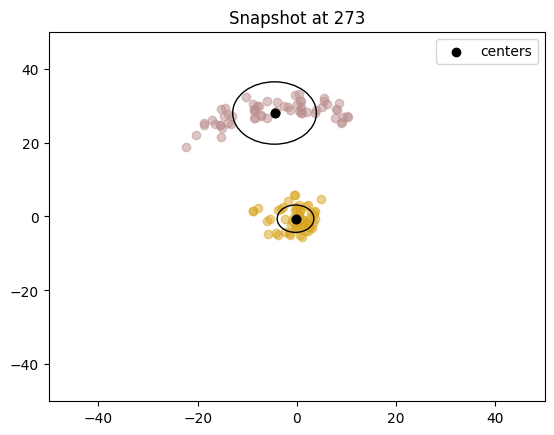

<Figure size 1000x1000 with 0 Axes>

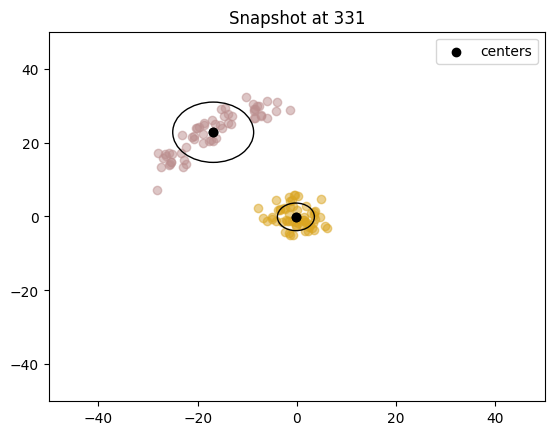

<Figure size 1000x1000 with 0 Axes>

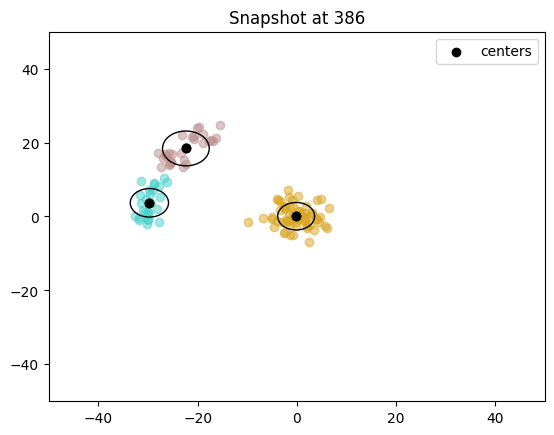

<Figure size 1000x1000 with 0 Axes>

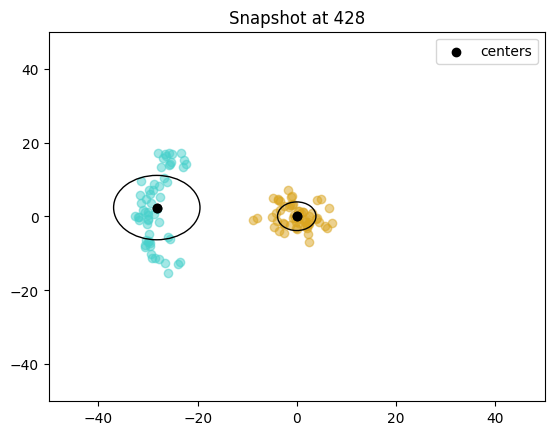

<Figure size 1000x1000 with 0 Axes>

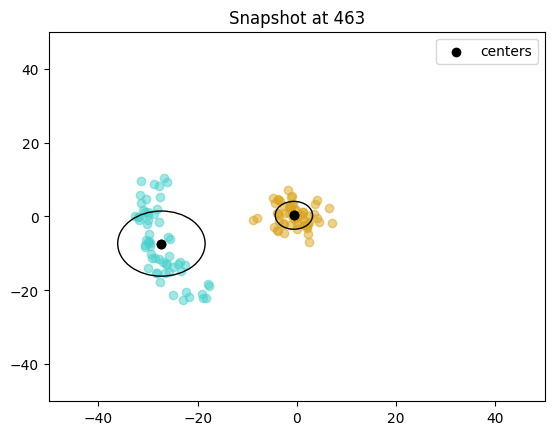

<Figure size 1000x1000 with 0 Axes>

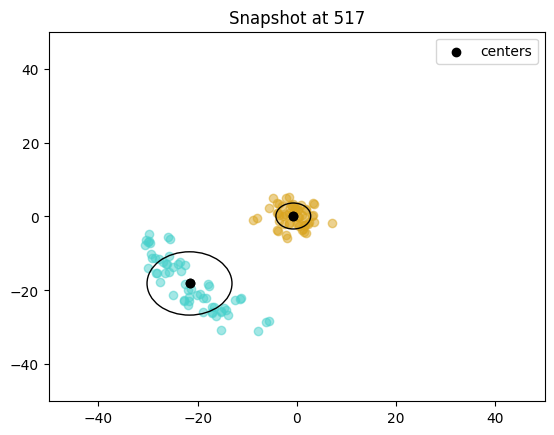

<Figure size 1000x1000 with 0 Axes>

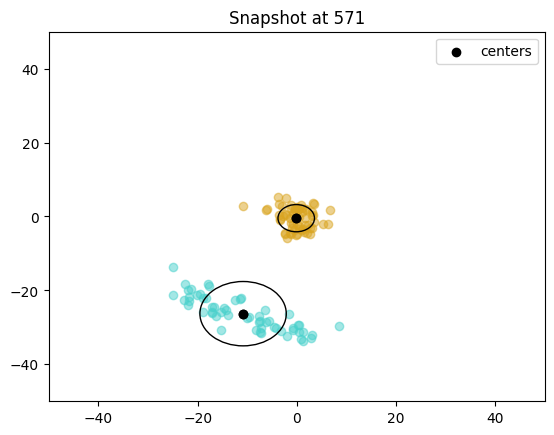

<Figure size 1000x1000 with 0 Axes>

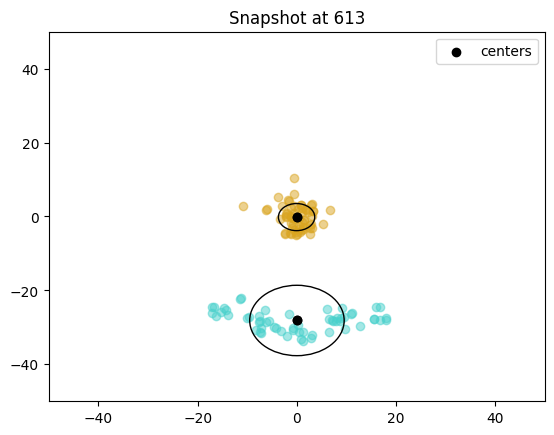

<Figure size 1000x1000 with 0 Axes>

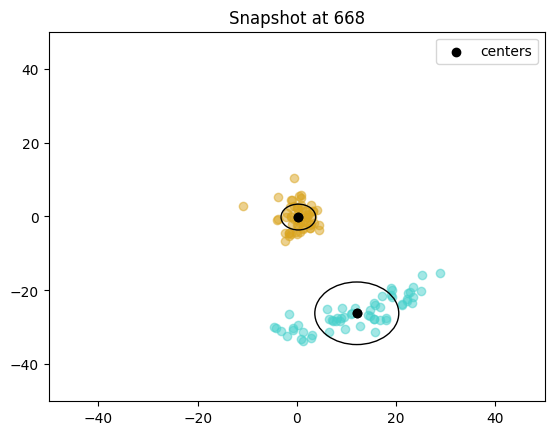

<Figure size 1000x1000 with 0 Axes>

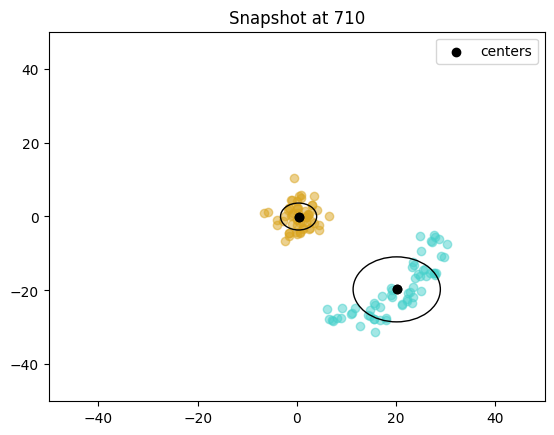

<Figure size 1000x1000 with 0 Axes>

In [29]:
""" ######################## Define Reference ########################"""

ref_means = np.array([[30, 0], [0, 0]])
ref_std_devs = np.array([[2, 2], [3, 3]])
n_samples_ref = 60


def init_reference(
    ref_means=ref_means,
    ref_std_devs=ref_std_devs,
    n_samples_ref=n_samples_ref,
    threshold=50,
):
    clustream_model = CluStream(
        max_micro_clusters=120,
        time_window=120,
        seed=0,
    )
    data_ref = get_data(ref_means, ref_std_devs, n_samples_ref)
    drift_detector = drift.PageHinkley(delta=0.005, threshold=threshold)
    clustream_reference = DynamicClusterer(
        data_ref,
        clustream_model,
        drift_detector,
        colors,
        x_limits=(-50, 50),
        y_limits=(-50, 50),
    )
    return clustream_reference


clustream = init_reference()

id = clustream.get_id()
ids.append(id)

full_data = get_data(ref_means, ref_std_devs, n_samples_ref)

""" ######################## Online ########################"""

trajectory = circular_trajectory(center_x=0, center_y=0, radius=30, num_points=25)

prod_means_shift = []
for element in trajectory:
    prod_means_shift.append(np.array([element, [0, 0]]))

prod_std_devs_shift = np.array([[2, 2], [3, 3]])
n_samples_shift = 15

# clustream.clean_plots()

for prod_means in prod_means_shift:
    prod_data = get_data(prod_means, prod_std_devs_shift, n_samples_shift)
    clustream.receive_prod(prod_data)
    clustream.fit_prod_data(plot_img=False, macroclustering_at_end=False)

    full_data = np.concatenate((full_data, prod_data), axis=0)
    # plot_data(full_data)

clustream.draw_snapshots()
clustream.draw_gif(title="faster circular shifting")
print()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


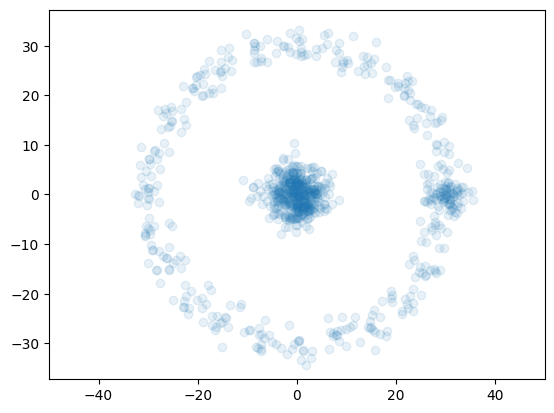

<Figure size 1000x1000 with 0 Axes>

In [30]:
plot_data(full_data)

### Multiple merging


New model created - id: 25069
(id: 0 - cen: [-29.77  -0.22] - rad: 2.38)
(id: 1 - cen: [9.75 9.32] - rad: 2.14)
(id: 2 - cen: [ 10.63 -10.54] - rad: 2.1)
(id: 3 - cen: [-11.31  -9.79] - rad: 2.93)
(id: 4 - cen: [2.954e+01 1.000e-02] - rad: 2.84)
(id: 5 - cen: [-10.11   9.86] - rad: 2.26)
<!> Change detected! Possible input drift at timestamp 62 ----> Apply macroclustering <!>

(id: 5 - cen: [-10.11   9.86] - rad: 2.26) SURVIVED as (id: 5 - cen: [-10.13  10.04] - rad: 2.65) (score: 0.9743845533132052)
(id: 2 - cen: [ 10.63 -10.54] - rad: 2.1) SURVIVED as (id: 2 - cen: [ 10.13 -10.56] - rad: 2.49) (score: 0.92618850685424)
(id: 3 - cen: [-11.31  -9.79] - rad: 2.93) SURVIVED as (id: 3 - cen: [-11.18 -10.1 ] - rad: 2.68) (score: 0.9589158853325689)
(id: 0 - cen: [-29.77  -0.22] - rad: 2.38) SURVIVED as (id: 0 - cen: [-30.39   0.25] - rad: 2.84) (score: 0.9011952484802174)
(id: 1 - cen: [9.75 9.32] - rad: 2.14) SURVIVED as (id: 1 - cen: [9.86 9.46] - rad: 2.32) (score: 0.9732022922767012)
(

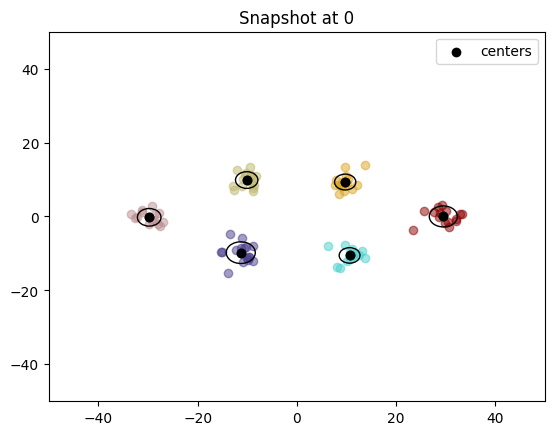

<Figure size 1000x1000 with 0 Axes>

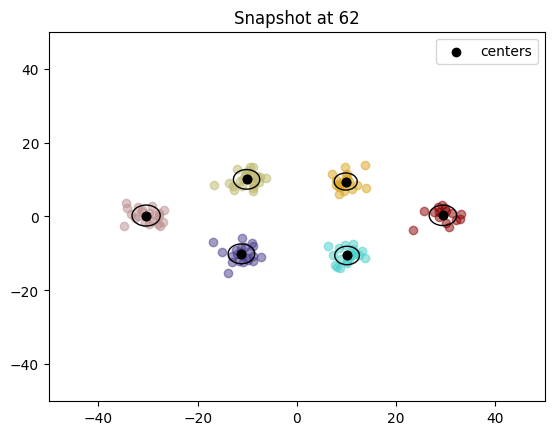

<Figure size 1000x1000 with 0 Axes>

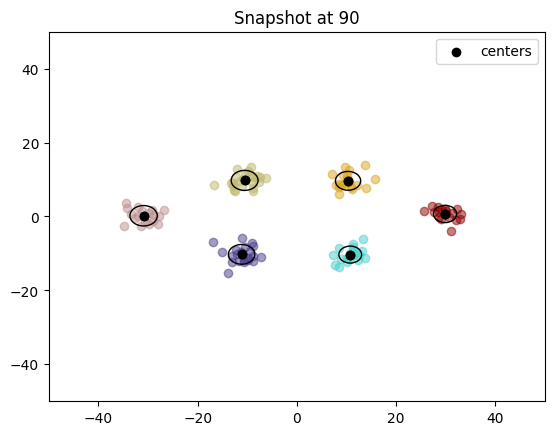

<Figure size 1000x1000 with 0 Axes>

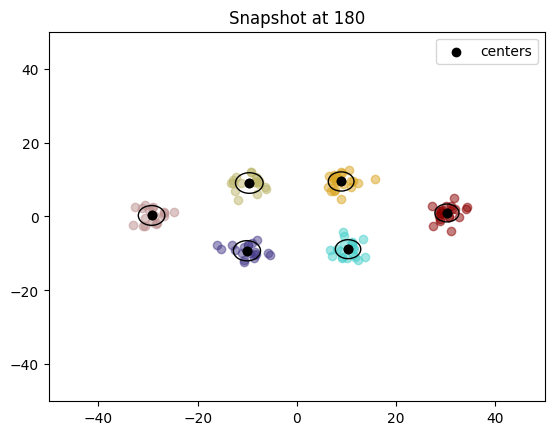

<Figure size 1000x1000 with 0 Axes>

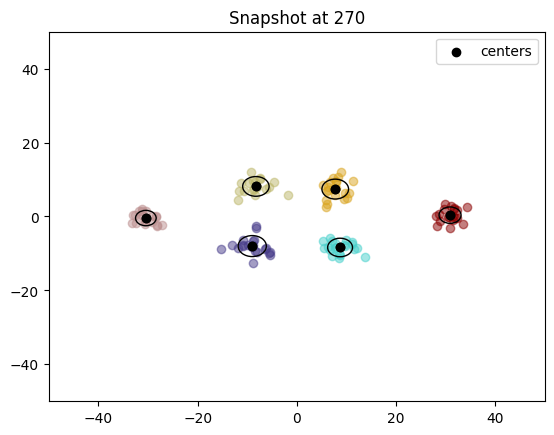

<Figure size 1000x1000 with 0 Axes>

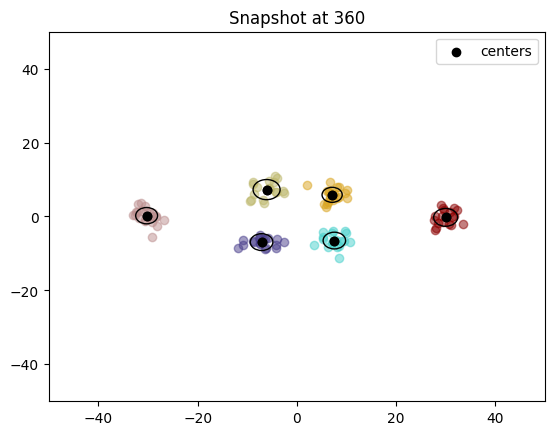

<Figure size 1000x1000 with 0 Axes>

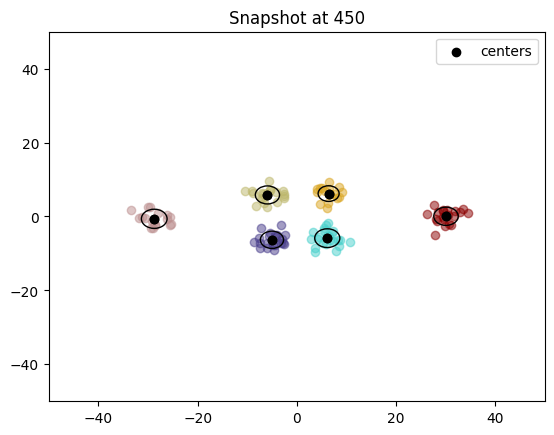

<Figure size 1000x1000 with 0 Axes>

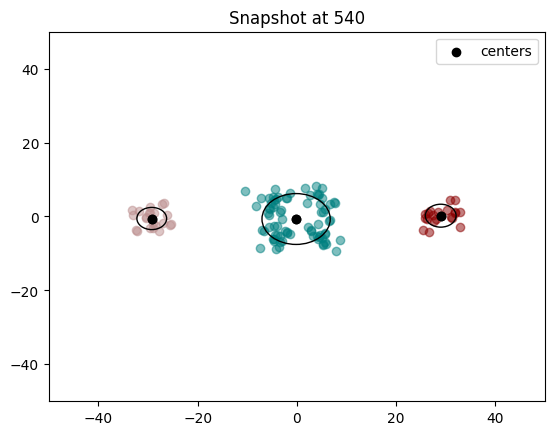

<Figure size 1000x1000 with 0 Axes>

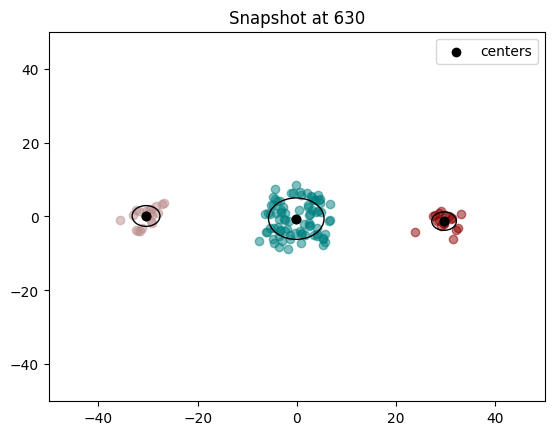

<Figure size 1000x1000 with 0 Axes>

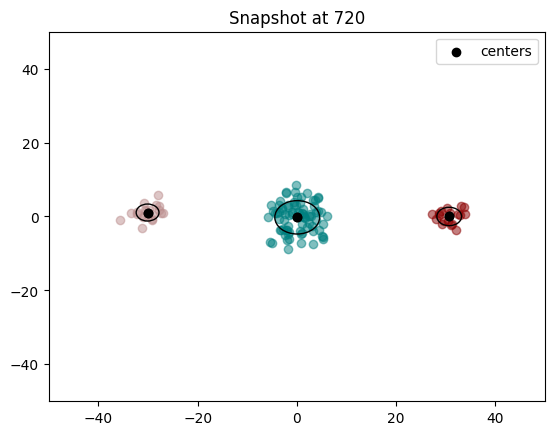

<Figure size 1000x1000 with 0 Axes>

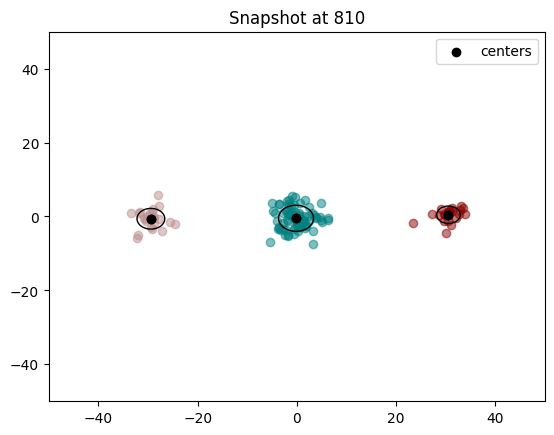

<Figure size 1000x1000 with 0 Axes>

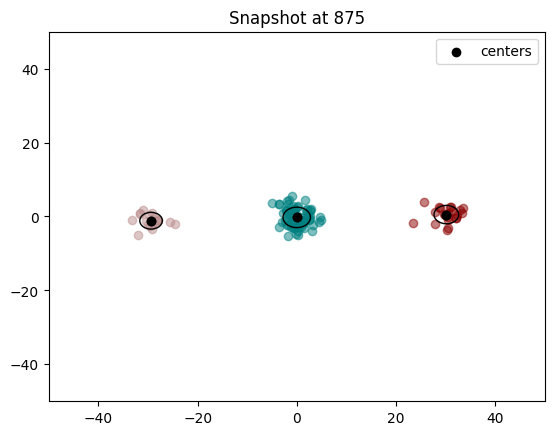

<Figure size 1000x1000 with 0 Axes>

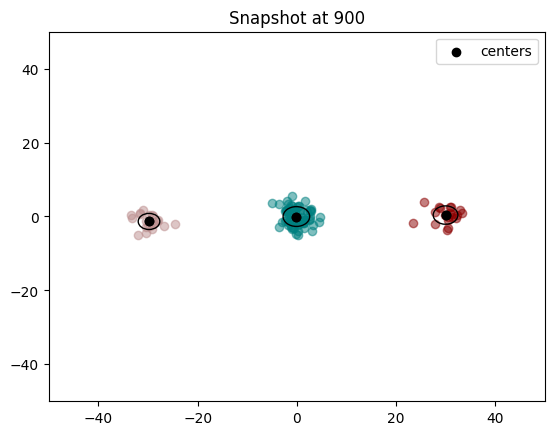

<Figure size 1000x1000 with 0 Axes>

In [31]:
""" ######################## Define Reference ########################"""

ref_means = np.array([[10, -10], [10, 10], [-10, 10], [-10, -10], [-30, 0], [30, 0]])
ref_std_devs = np.array([[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]])
n_samples_ref = 15


def init_reference(
    ref_means=ref_means,
    ref_std_devs=ref_std_devs,
    n_samples_ref=n_samples_ref,
    threshold=50,
):
    clustream_model = CluStream(
        max_micro_clusters=120,
        time_window=120,
        seed=0,
    )
    data_ref = get_data(ref_means, ref_std_devs, n_samples_ref)
    drift_detector = drift.PageHinkley(delta=0.005, threshold=threshold)
    clustream_reference = DynamicClusterer(
        data_ref,
        clustream_model,
        drift_detector,
        colors,
        x_limits=(-50, 50),
        y_limits=(-50, 50),
    )
    return clustream_reference


clustream = init_reference()
id = clustream.get_id()
ids.append(id)

full_data = get_data(ref_means, ref_std_devs, n_samples_ref)

""" ######################## Online ########################"""

trajectory_0 = linear_trajectory(start_point=(-10, 10), end_point=(0, 0), num_points=10)
trajectory_1 = linear_trajectory(start_point=(10, 10), end_point=(0, 0), num_points=10)
trajectory_2 = linear_trajectory(start_point=(10, -10), end_point=(0, 0), num_points=10)
trajectory_3 = linear_trajectory(
    start_point=(-10, -10), end_point=(0, 0), num_points=10
)

prod_means_shift = []
for i in range(10):
    prod_means_shift.append(
        np.array(
            [
                trajectory_0[i],
                trajectory_1[i],
                trajectory_2[i],
                trajectory_3[i],
                [30, 0],
                [-30, 0],
            ]
        )
    )

prod_std_devs_shift = np.array([[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]])
n_samples_shift = 15

# clustream.clean_plots()

for prod_means in prod_means_shift:
    prod_data = get_data(prod_means, prod_std_devs_shift, n_samples_shift)
    clustream.receive_prod(prod_data)
    clustream.fit_prod_data(plot_img=False, macroclustering_at_end=True)

    full_data = np.concatenate((full_data, prod_data), axis=0)
    # plot_data(full_data)

clustream.draw_snapshots()
clustream.draw_gif(title="multiple merging")
print()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


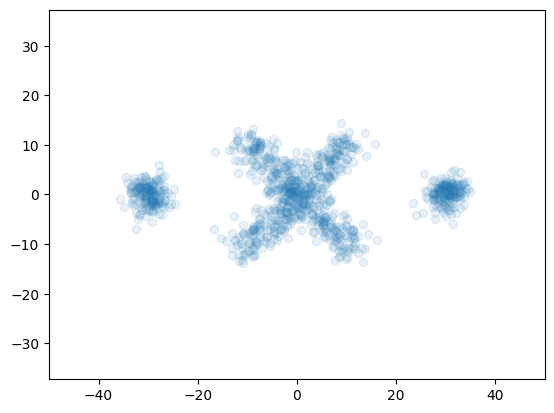

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plot_data(full_data)
# anim_data(full_data,title='multiple_merging')

### Multiple Splitting


New model created - id: 26305
(id: 0 - cen: [0.11 0.23] - rad: 2.87)
(id: 1 - cen: [30.25 -0.51] - rad: 2.53)
(id: 2 - cen: [-29.79   0.12] - rad: 2.48)
Batch Finished ----> Apply macroclustering

(id: 0 - cen: [0.11 0.23] - rad: 2.87) SURVIVED as (id: 0 - cen: [ 0.16 -0.27] - rad: 2.57) (score: 0.938531072771481)
(id: 2 - cen: [-29.79   0.12] - rad: 2.48) SURVIVED as (id: 2 - cen: [-28.92  -0.15] - rad: 2.42) (score: 0.8800492322772837)
(id: 1 - cen: [30.25 -0.51] - rad: 2.53) SURVIVED as (id: 1 - cen: [30.3  -0.05] - rad: 2.52) (score: 0.9389214314847384)
Final macroclusters:
(id: 0 - cen: [ 0.16 -0.27] - rad: 2.57)
(id: 1 - cen: [30.3  -0.05] - rad: 2.52)
(id: 2 - cen: [-28.92  -0.15] - rad: 2.42)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 142 ----> Apply macroclustering <!>

(id: 0 - cen: [ 0.16 -0.27] - rad: 2.57) SURVIVED as (id: 0 - cen: [ 0.14 -0.14] - rad: 2.7) (score: 0.982997670

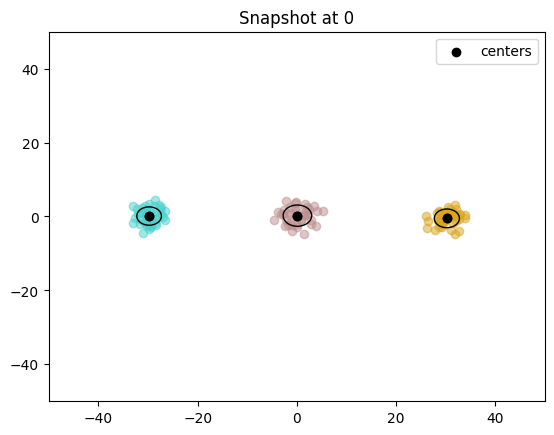

<Figure size 1000x1000 with 0 Axes>

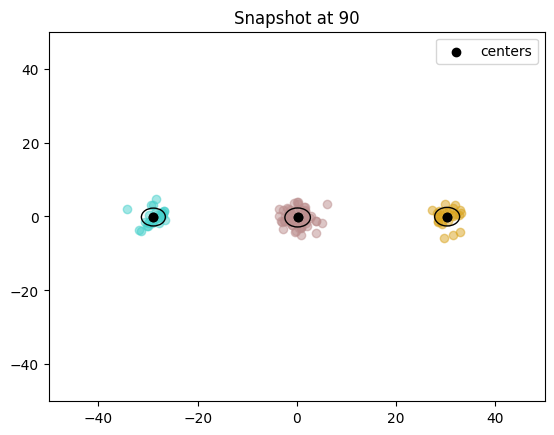

<Figure size 1000x1000 with 0 Axes>

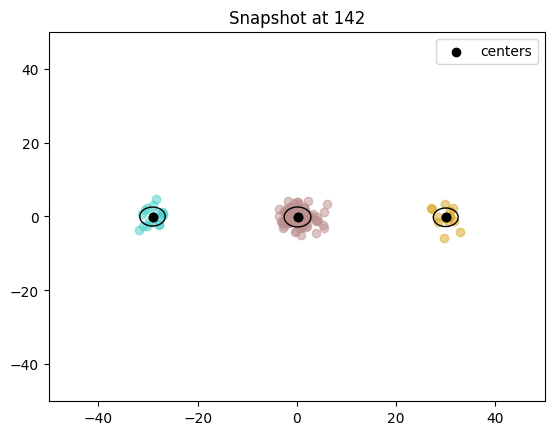

<Figure size 1000x1000 with 0 Axes>

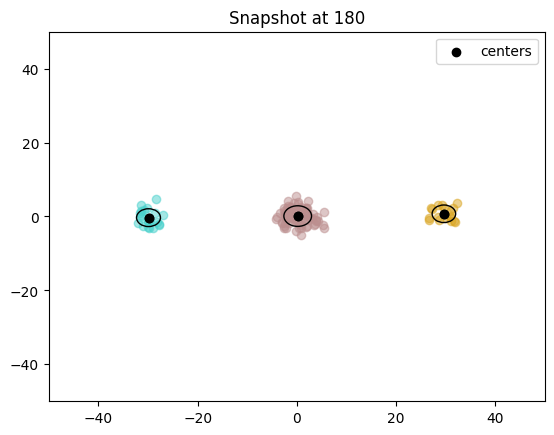

<Figure size 1000x1000 with 0 Axes>

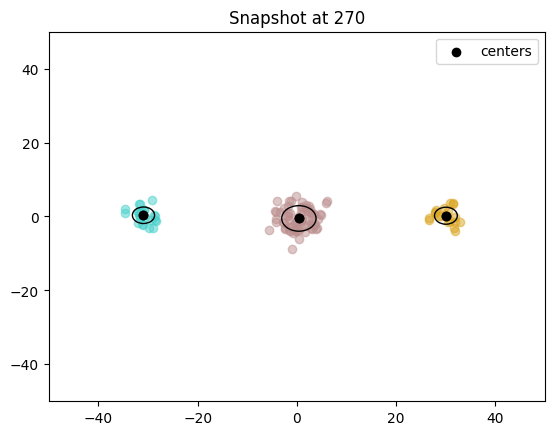

<Figure size 1000x1000 with 0 Axes>

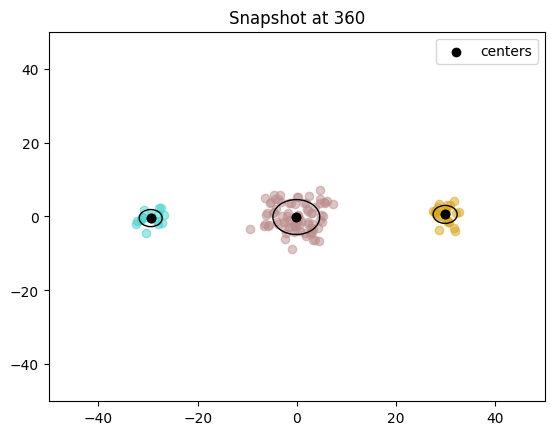

<Figure size 1000x1000 with 0 Axes>

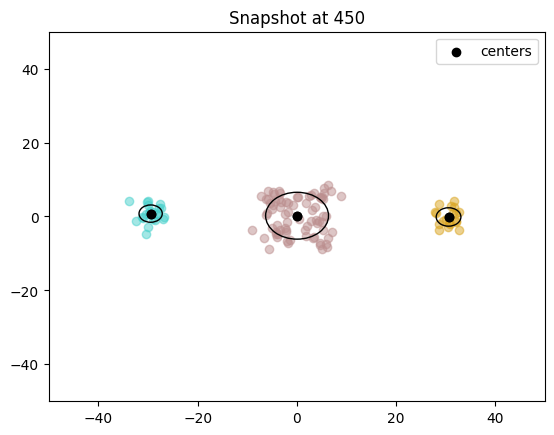

<Figure size 1000x1000 with 0 Axes>

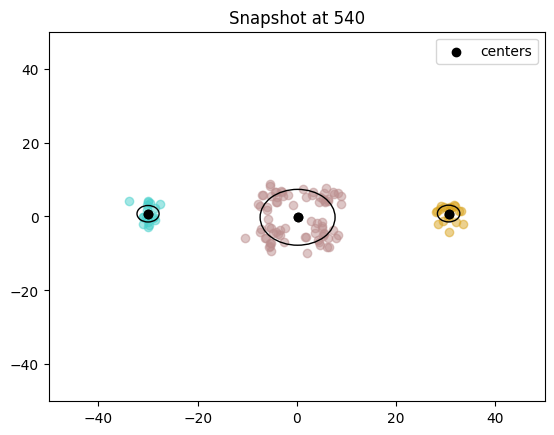

<Figure size 1000x1000 with 0 Axes>

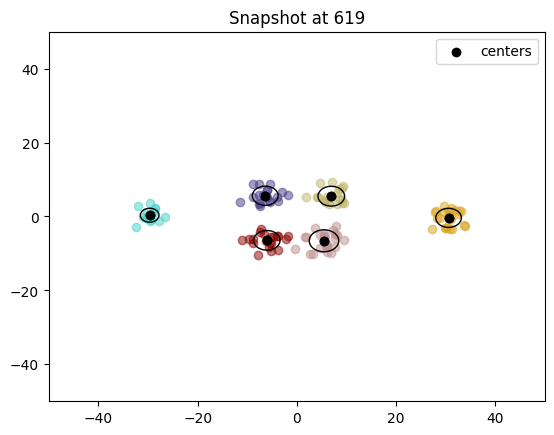

<Figure size 1000x1000 with 0 Axes>

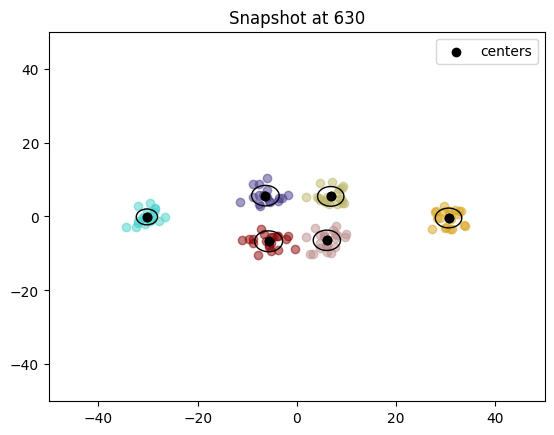

<Figure size 1000x1000 with 0 Axes>

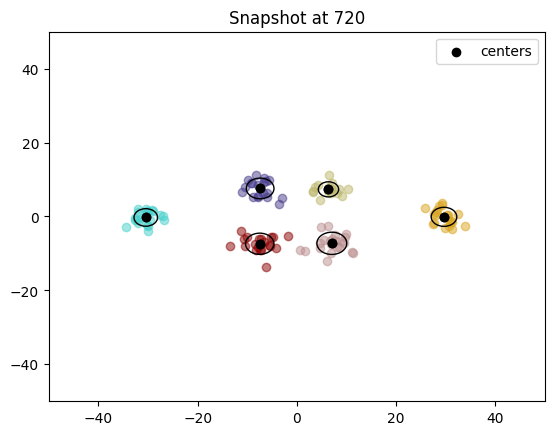

<Figure size 1000x1000 with 0 Axes>

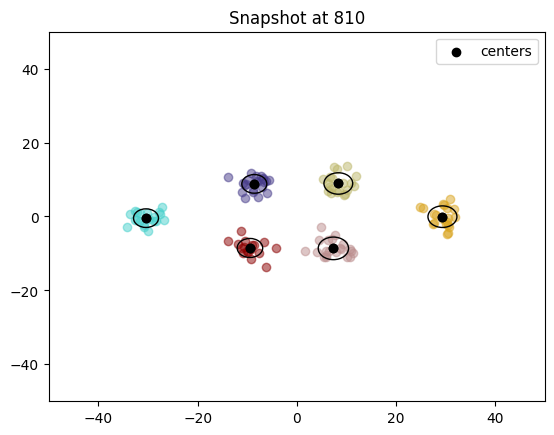

<Figure size 1000x1000 with 0 Axes>

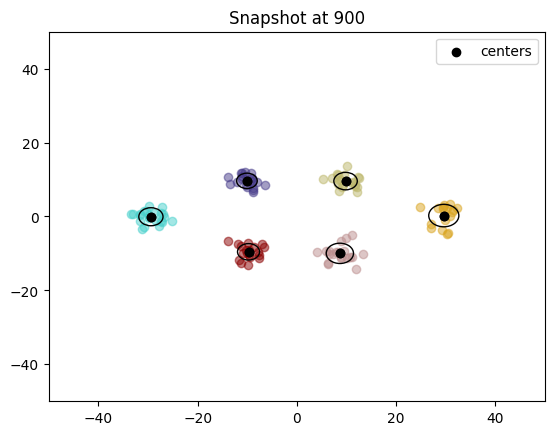

<Figure size 1000x1000 with 0 Axes>

In [33]:
""" ######################## Define Reference ########################"""

ref_means = np.array([[0, 0], [-30, 0], [30, 0]])
ref_std_devs = np.array([[2, 2], [2, 2], [2, 2]])
n_samples_ref = 60


def init_reference(
    ref_means=ref_means,
    ref_std_devs=ref_std_devs,
    n_samples_ref=n_samples_ref,
    threshold=50,
):
    clustream_model = CluStream(
        max_micro_clusters=120,
        time_window=120,
        seed=0,
    )
    data_ref = get_data(ref_means, ref_std_devs, n_samples_ref)
    drift_detector = drift.PageHinkley(delta=0.005, threshold=threshold)
    clustream_reference = DynamicClusterer(
        data_ref,
        clustream_model,
        drift_detector,
        colors,
        x_limits=(-50, 50),
        y_limits=(-50, 50),
    )
    return clustream_reference


clustream = init_reference()
id = clustream.get_id()
ids.append(id)

full_data = get_data(ref_means, ref_std_devs, n_samples_ref)

""" ######################## Online ########################"""

trajectory_0 = linear_trajectory(start_point=(0, 0), end_point=(-10, 10), num_points=10)
trajectory_1 = linear_trajectory(start_point=(0, 0), end_point=(10, 10), num_points=10)
trajectory_2 = linear_trajectory(start_point=(0, 0), end_point=(10, -10), num_points=10)
trajectory_3 = linear_trajectory(
    start_point=(0, 0), end_point=(-10, -10), num_points=10
)

prod_means_shift = []
for i in range(10):
    prod_means_shift.append(
        np.array(
            [
                trajectory_0[i],
                trajectory_1[i],
                trajectory_2[i],
                trajectory_3[i],
                [30, 0],
                [-30, 0],
            ]
        )
    )

prod_std_devs_shift = np.array([[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]])
n_samples_shift = 15

# clustream.clean_plots()

for prod_means in prod_means_shift:
    prod_data = get_data(prod_means, prod_std_devs_shift, n_samples_shift)
    clustream.receive_prod(prod_data)
    clustream.fit_prod_data(plot_img=False, macroclustering_at_end=True)

    full_data = np.concatenate((full_data, prod_data), axis=0)
    # plot_data(full_data)

clustream.draw_snapshots()
clustream.draw_gif(title="multiple splitting")
print()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


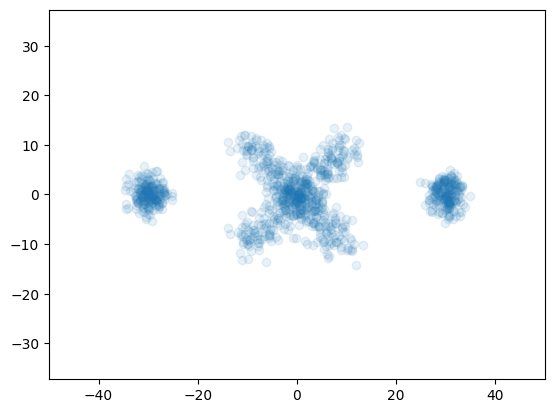

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plot_data(full_data)
# anim_data(full_data,title='multiple_splitting')

### Splitting, merging and moving


New model created - id: 86851
(id: 0 - cen: [20.12 -0.31] - rad: 2.59)
(id: 1 - cen: [-19.95   0.06] - rad: 2.55)
(id: 2 - cen: [0.12 0.11] - rad: 2.49)
<!> Change detected! Possible input drift at timestamp 115 ----> Apply macroclustering <!>

(id: 2 - cen: [0.12 0.11] - rad: 2.49) SURVIVED as (id: 2 - cen: [-0.23  0.1 ] - rad: 2.96) (score: 0.9560566073768302)
(id: 0 - cen: [20.12 -0.31] - rad: 2.59) SURVIVED as (id: 0 - cen: [20.46 -0.16] - rad: 2.9) (score: 0.954238121950663)
(id: 1 - cen: [-19.95   0.06] - rad: 2.55) SURVIVED as (id: 1 - cen: [-19.6  -1. ] - rad: 2.33) (score: 0.8535073249795511)
Final macroclusters:
(id: 0 - cen: [20.46 -0.16] - rad: 2.9)
(id: 1 - cen: [-19.6  -1. ] - rad: 2.33)
(id: 2 - cen: [-0.23  0.1 ] - rad: 2.96)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 261 ----> Apply macroclustering <!>

(id: 2 - cen: [-0.23  0.1 ] - rad: 2.96) SURVIVED as (id: 2 - cen: [-0

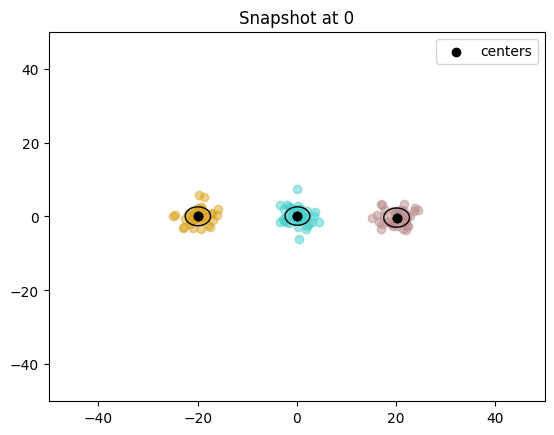

<Figure size 1000x1000 with 0 Axes>

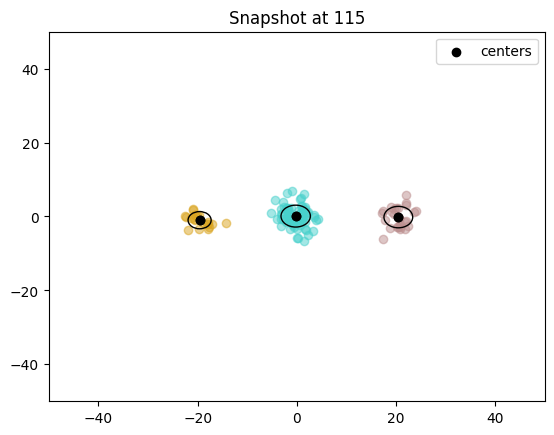

<Figure size 1000x1000 with 0 Axes>

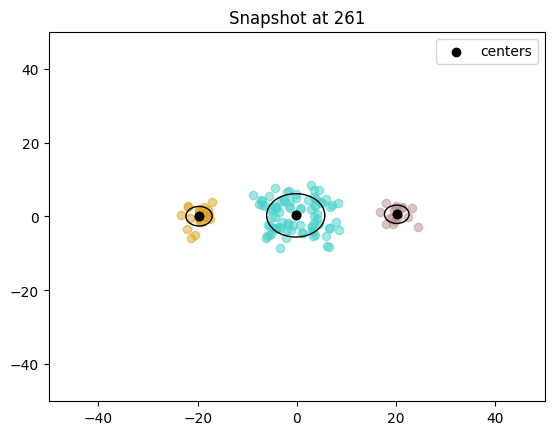

<Figure size 1000x1000 with 0 Axes>

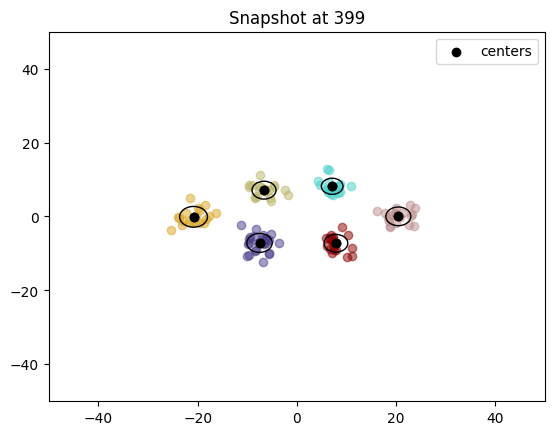

<Figure size 1000x1000 with 0 Axes>

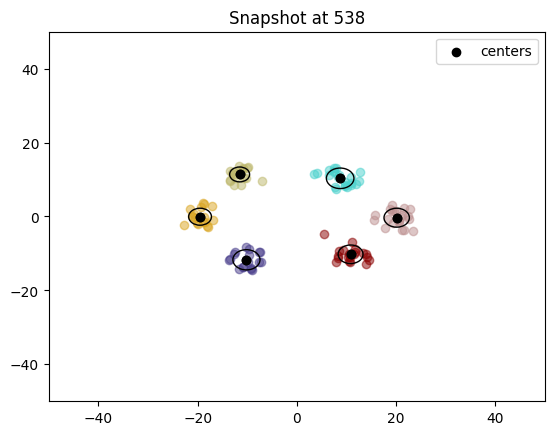

<Figure size 1000x1000 with 0 Axes>

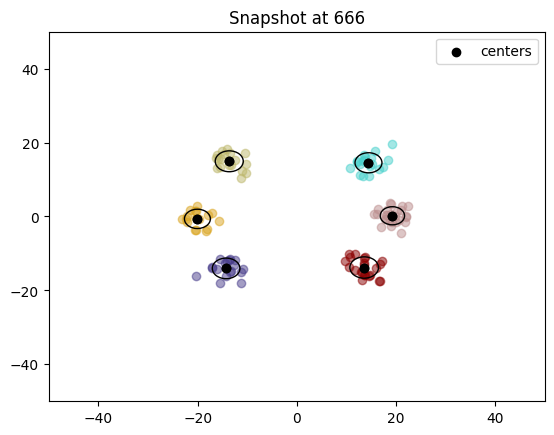

<Figure size 1000x1000 with 0 Axes>

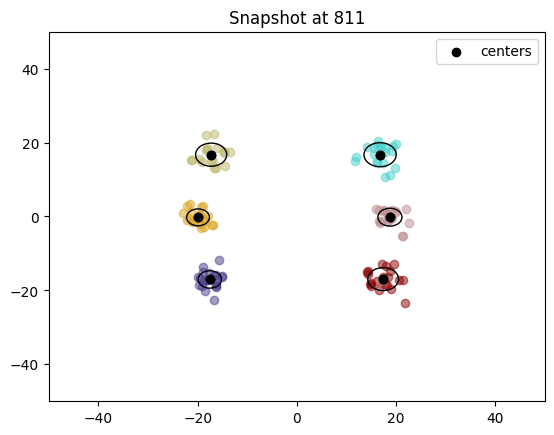

<Figure size 1000x1000 with 0 Axes>

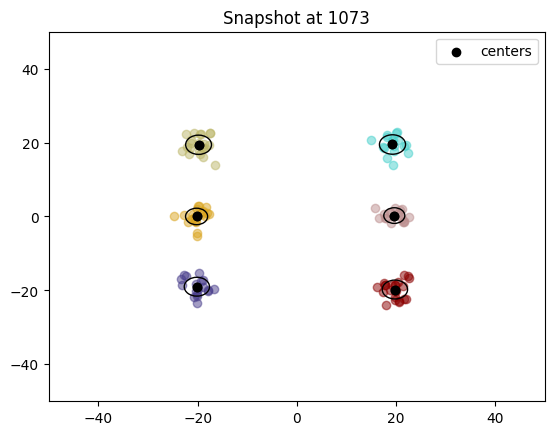

<Figure size 1000x1000 with 0 Axes>

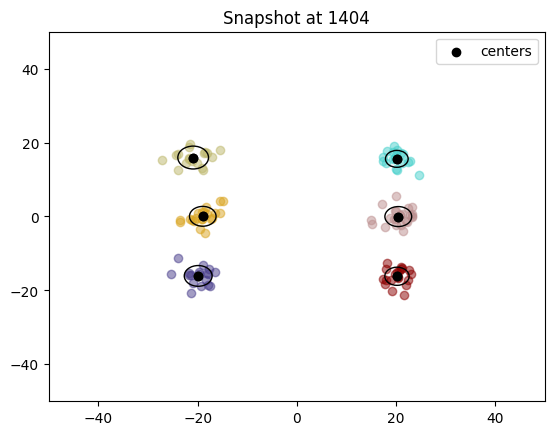

<Figure size 1000x1000 with 0 Axes>

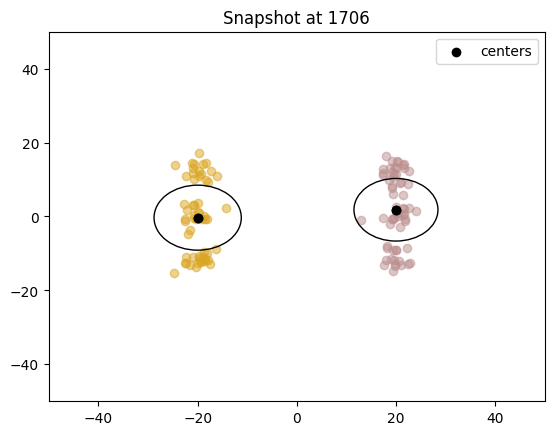

<Figure size 1000x1000 with 0 Axes>

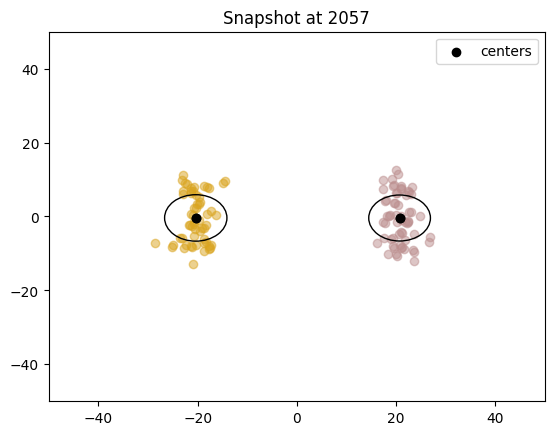

<Figure size 1000x1000 with 0 Axes>

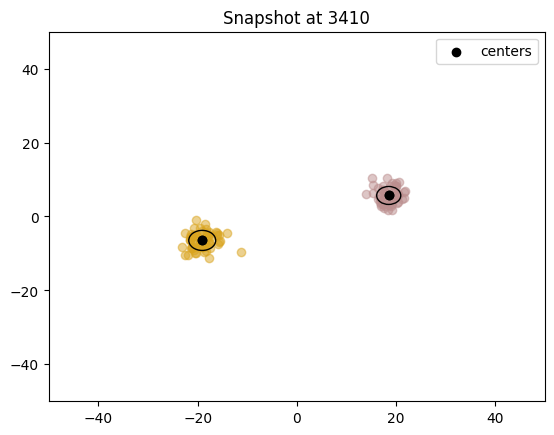

<Figure size 1000x1000 with 0 Axes>

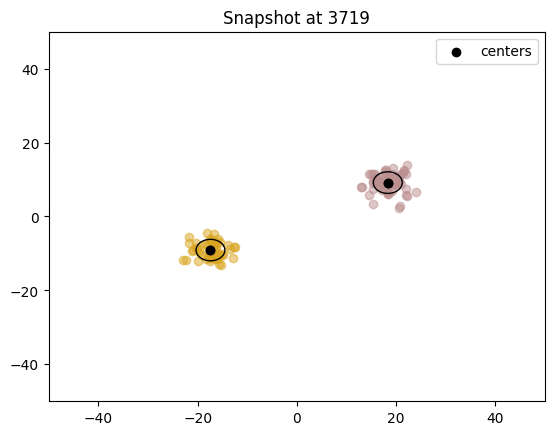

<Figure size 1000x1000 with 0 Axes>

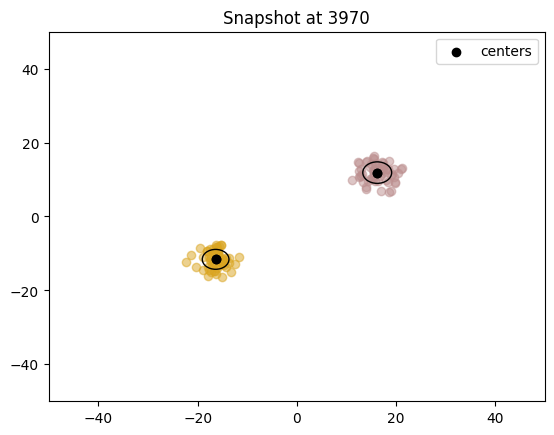

<Figure size 1000x1000 with 0 Axes>

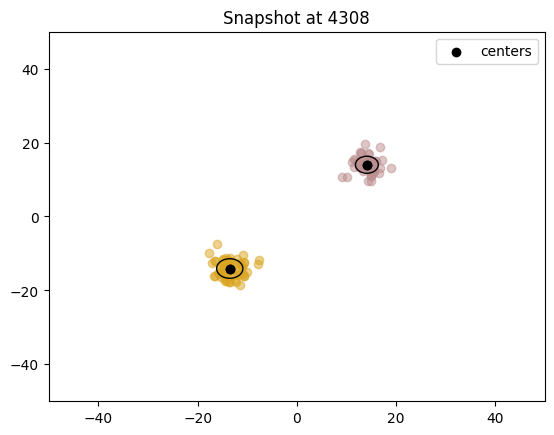

<Figure size 1000x1000 with 0 Axes>

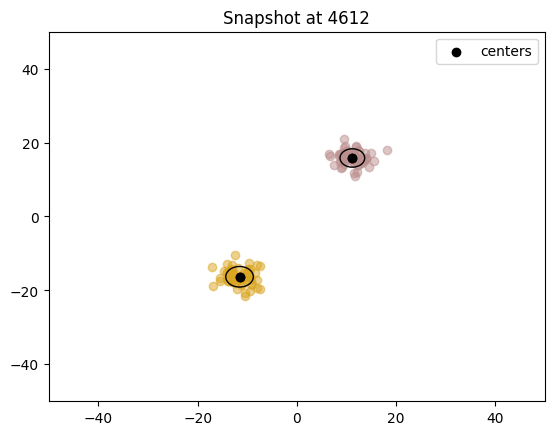

<Figure size 1000x1000 with 0 Axes>

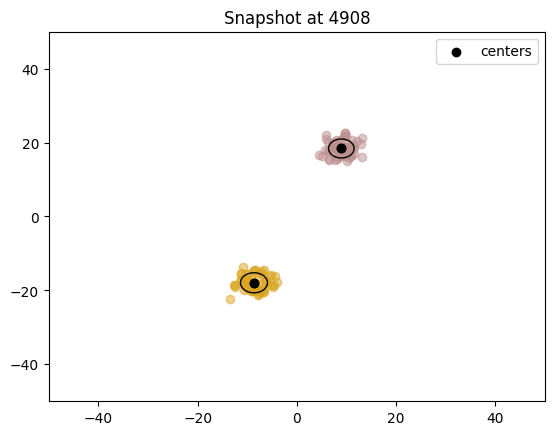

<Figure size 1000x1000 with 0 Axes>

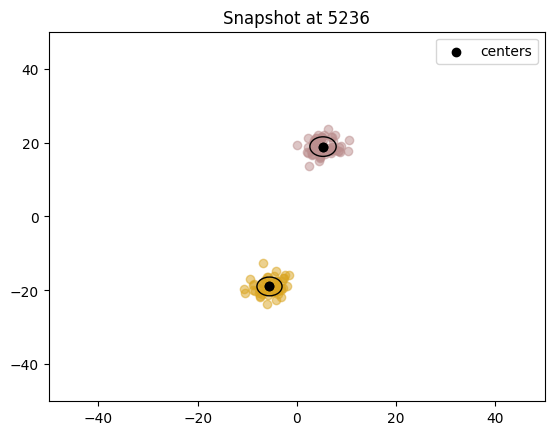

<Figure size 1000x1000 with 0 Axes>

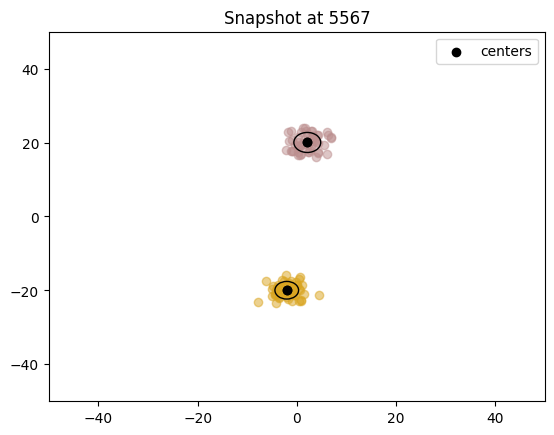

<Figure size 1000x1000 with 0 Axes>

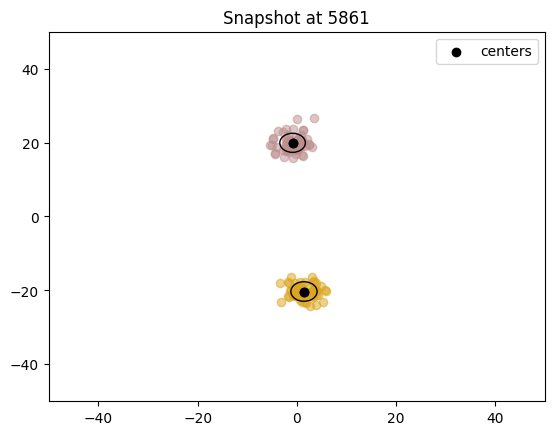

<Figure size 1000x1000 with 0 Axes>

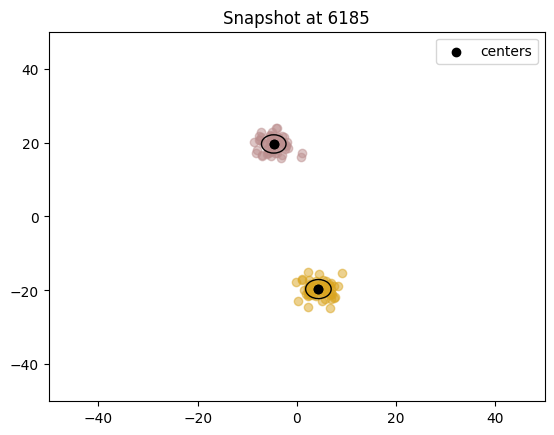

<Figure size 1000x1000 with 0 Axes>

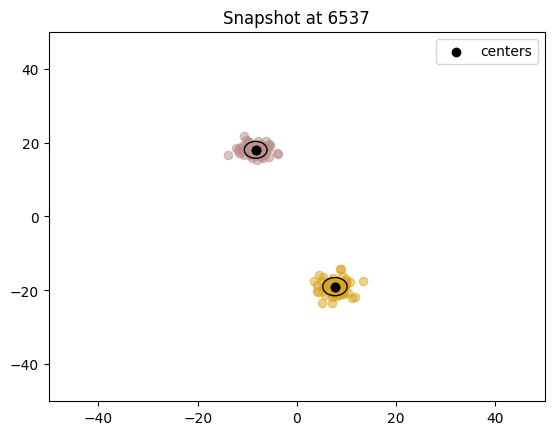

<Figure size 1000x1000 with 0 Axes>

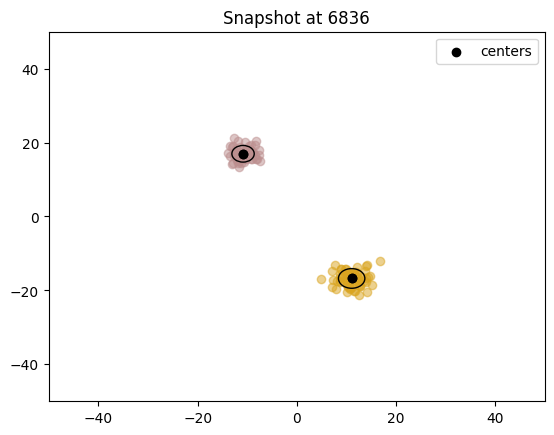

<Figure size 1000x1000 with 0 Axes>

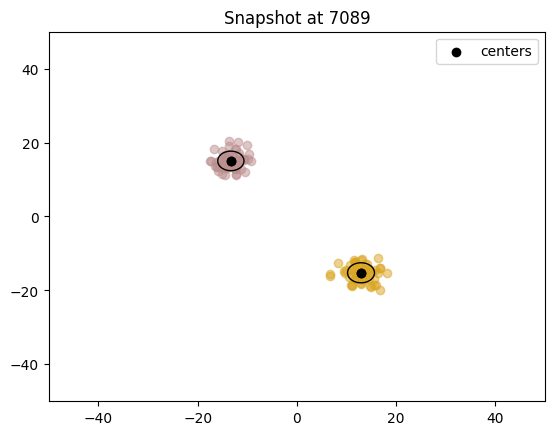

<Figure size 1000x1000 with 0 Axes>

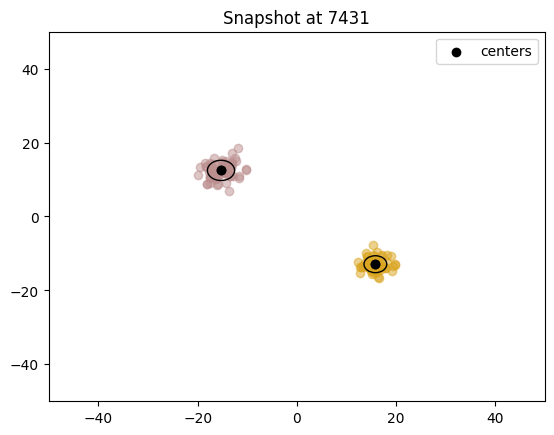

<Figure size 1000x1000 with 0 Axes>

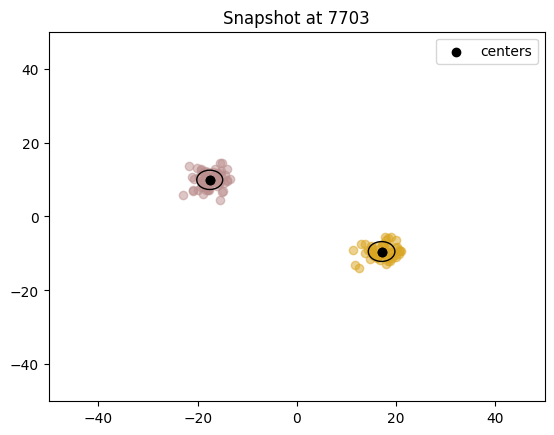

<Figure size 1000x1000 with 0 Axes>

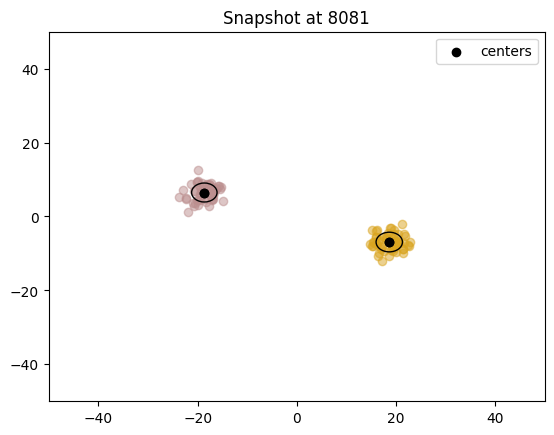

<Figure size 1000x1000 with 0 Axes>

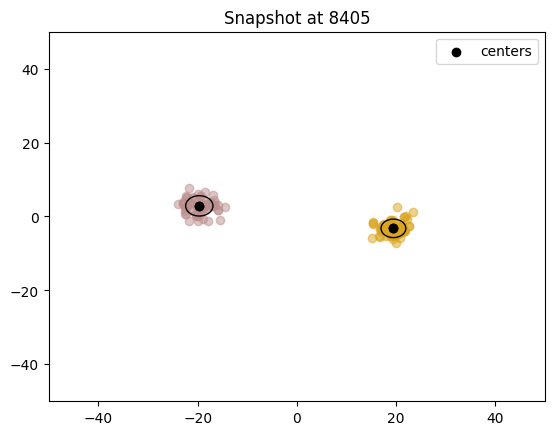

<Figure size 1000x1000 with 0 Axes>

In [ ]:
""" ######################## Define Reference ########################"""

ref_means = np.array([[0, 0], [-20, 0], [20, 0]])
ref_std_devs = np.array([[2, 2], [2, 2], [2, 2]])
n_samples_ref = 60


def init_reference(
    ref_means=ref_means,
    ref_std_devs=ref_std_devs,
    n_samples_ref=n_samples_ref,
    threshold=50,
):
    clustream_model = CluStream(
        max_micro_clusters=120,
        time_window=120,
        seed=0,
    )
    data_ref = get_data(ref_means, ref_std_devs, n_samples_ref)
    drift_detector = drift.PageHinkley(delta=0.005, threshold=threshold)
    clustream_reference = DynamicClusterer(
        data_ref,
        clustream_model,
        drift_detector,
        colors,
        x_limits=(-50, 50),
        y_limits=(-50, 50),
    )
    return clustream_reference


clustream = init_reference()
id = clustream.get_id()
ids.append(id)

full_data = get_data(ref_means, ref_std_devs, n_samples_ref)

""" ######################## Splitting ########################"""

trajectory_0 = linear_trajectory(start_point=(0, 0), end_point=(-20, 20), num_points=10)
trajectory_1 = linear_trajectory(start_point=(0, 0), end_point=(20, 20), num_points=10)
trajectory_2 = linear_trajectory(start_point=(0, 0), end_point=(20, -20), num_points=10)
trajectory_3 = linear_trajectory(
    start_point=(0, 0), end_point=(-20, -20), num_points=10
)

prod_means_shift = []
for i in range(10):
    prod_means_shift.append(
        np.array(
            [
                trajectory_0[i],
                trajectory_1[i],
                trajectory_2[i],
                trajectory_3[i],
                [20, 0],
                [-20, 0],
            ]
        )
    )

prod_std_devs_shift = np.array([[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]])
n_samples_shift = 15

# clustream.clean_plots()

for prod_means in prod_means_shift:
    prod_data = get_data(prod_means, prod_std_devs_shift, n_samples_shift)
    clustream.receive_prod(prod_data)

    clustream.fit_prod_data(plot_img=False, macroclustering_at_end=False)

    full_data = np.concatenate((full_data, prod_data), axis=0)
    # plot_data(full_data)

""" ######################## Merging ########################"""

trajectory_0 = linear_trajectory(
    start_point=(-20, 20), end_point=(-20, 0), num_points=20
)
trajectory_1 = linear_trajectory(start_point=(20, 20), end_point=(20, 0), num_points=20)
trajectory_2 = linear_trajectory(
    start_point=(20, -20), end_point=(20, 0), num_points=20
)
trajectory_3 = linear_trajectory(
    start_point=(-20, -20), end_point=(-20, 0), num_points=20
)

prod_means_shift = []
for i in range(20):
    prod_means_shift.append(
        np.array(
            [
                trajectory_0[i],
                trajectory_1[i],
                trajectory_2[i],
                trajectory_3[i],
                [20, 0],
                [-20, 0],
            ]
        )
    )

prod_std_devs_shift = np.array([[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]])
n_samples_shift = 15

# clustream.clean_plots()

for prod_means in prod_means_shift:
    prod_data = get_data(prod_means, prod_std_devs_shift, n_samples_shift)
    clustream.receive_prod(prod_data)
    # new_clustream.plot_prod_data()
    clustream.fit_prod_data(plot_img=False, macroclustering_at_end=False)

    full_data = np.concatenate((full_data, prod_data), axis=0)
    # plot_data(full_data)

    """ ######################## Shifting ########################"""

trajectory_0 = circular_trajectory(
    center_x=0,
    center_y=0,
    radius=20,
    num_points=50,
    start_angle=np.pi,
    end_angle=2 * np.pi,
)
trajectory_1 = circular_trajectory(
    center_x=0, center_y=0, radius=20, num_points=50, start_angle=0, end_angle=np.pi
)

prod_means_shift = []
for i in range(50):
    prod_means_shift.append(np.array([trajectory_0[i], trajectory_1[i]]))

prod_std_devs_shift = np.array([[2, 2], [2, 2]])
n_samples_shift = 60

# clustream.clean_plots()

for prod_means in prod_means_shift:
    prod_data = get_data(prod_means, prod_std_devs_shift, n_samples_shift)
    clustream.receive_prod(prod_data)
    # new_clustream.plot_prod_data()
    clustream.fit_prod_data(plot_img=False, macroclustering_at_end=False)

    full_data = np.concatenate((full_data, prod_data), axis=0)
    # plot_data(full_data)

""" ######################## Drawing ########################"""

clustream.draw_snapshots()
clustream.draw_gif(title="splitting and merging")
print()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


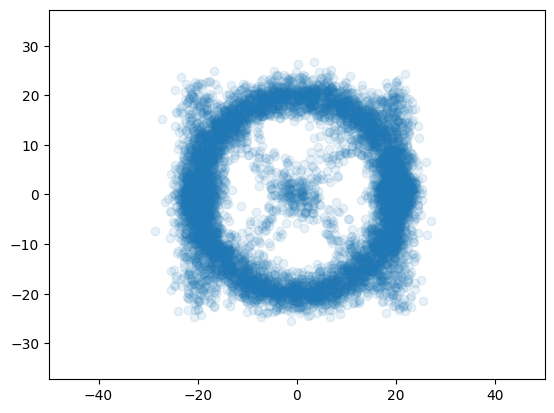

<Figure size 1000x1000 with 0 Axes>

In [36]:
plot_data(full_data)
# anim_data(full_data,title='complex_environment')

In [37]:
# Clean directory

for id in ids:
    ids.remove(id)
    clean_directory(f"./plots/{id}")
    print(f"Deleted {id}")

Directory './plots/96292' and its contents removed successfully.
Deleted 96292
Directory './plots/25069' and its contents removed successfully.
Deleted 25069
Directory './plots/86851' and its contents removed successfully.
Deleted 86851
